Starting download of the US Accidents dataset...


100%|██████████| 653M/653M [00:08<00:00, 80.1MB/s]

Extracting files...


Download complete. Files are located in: /root/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13
Loading main data file: US_Accidents_March23.csv
Successfully loaded 100000 rows for analysis.


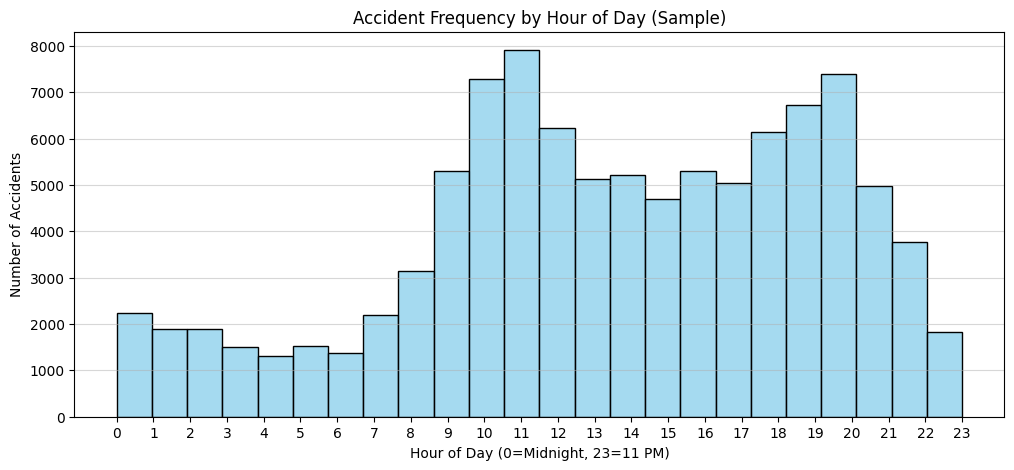


--- Top 10 States by Total Accident Count (Sample) ---
| State   |   count |
|:--------|--------:|
| CA      |   99272 |
| OH      |     726 |
| WV      |       2 |


In [20]:
import kagglehub
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from collections import Counter

print("Starting download of the US Accidents dataset...")

download_path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")
print(f"Download complete. Files are located in: {download_path}")

data_dir = Path(download_path)
main_csv_file = None
largest_size = 0

for file_path in data_dir.glob('*.csv'):
    if file_path.stat().st_size > largest_size:
        largest_size = file_path.stat().st_size
        main_csv_file = file_path

if main_csv_file:
    print(f"Loading main data file: {main_csv_file.name}")
else:
    print("Error: Could not find the main CSV file after download.")
    raise SystemExit()

accidents_df = pd.read_csv(
    main_csv_file,
    nrows=100000,
    parse_dates=['Start_Time', 'End_Time'],
    date_format='mixed'
)
print(f"Successfully loaded {len(accidents_df)} rows for analysis.")


accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'])
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour
accidents_df['Weekday'] = accidents_df['Start_Time'].dt.day_name()
accidents_df['Year'] = accidents_df['Start_Time'].dt.year

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=(12, 5))
sns.histplot(accidents_df['Hour'], bins=24, kde=False, color='skyblue')
plt.title('Accident Frequency by Hour of Day (Sample)')
plt.xlabel('Hour of Day (0=Midnight, 23=11 PM)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.5)
plt.show()

top_states = accidents_df['State'].value_counts().nlargest(10)

print("\n--- Top 10 States by Total Accident Count (Sample) ---")
print(top_states.to_markdown())

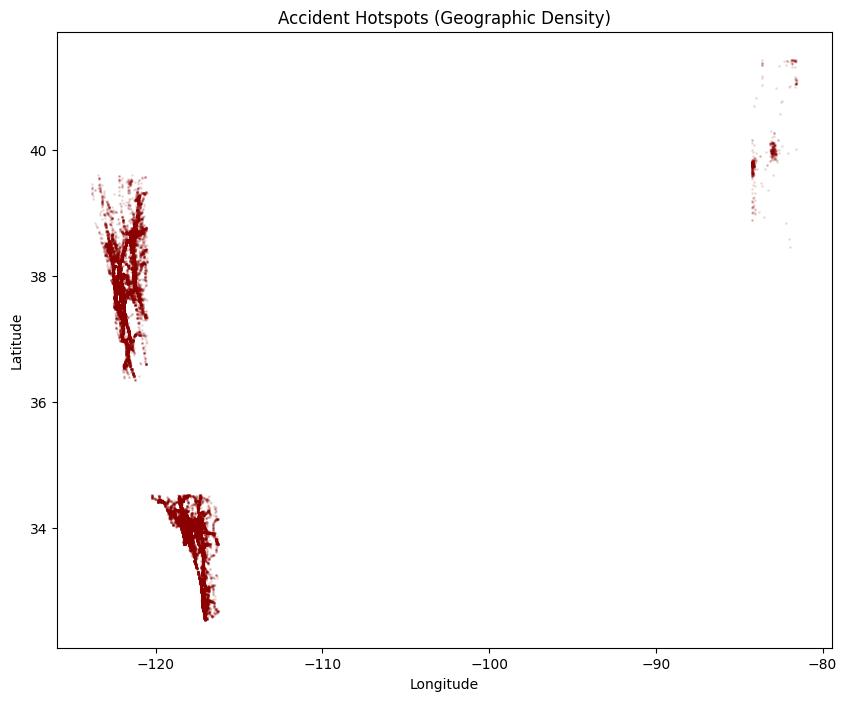

/tmp/ipython-input-3228358933.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


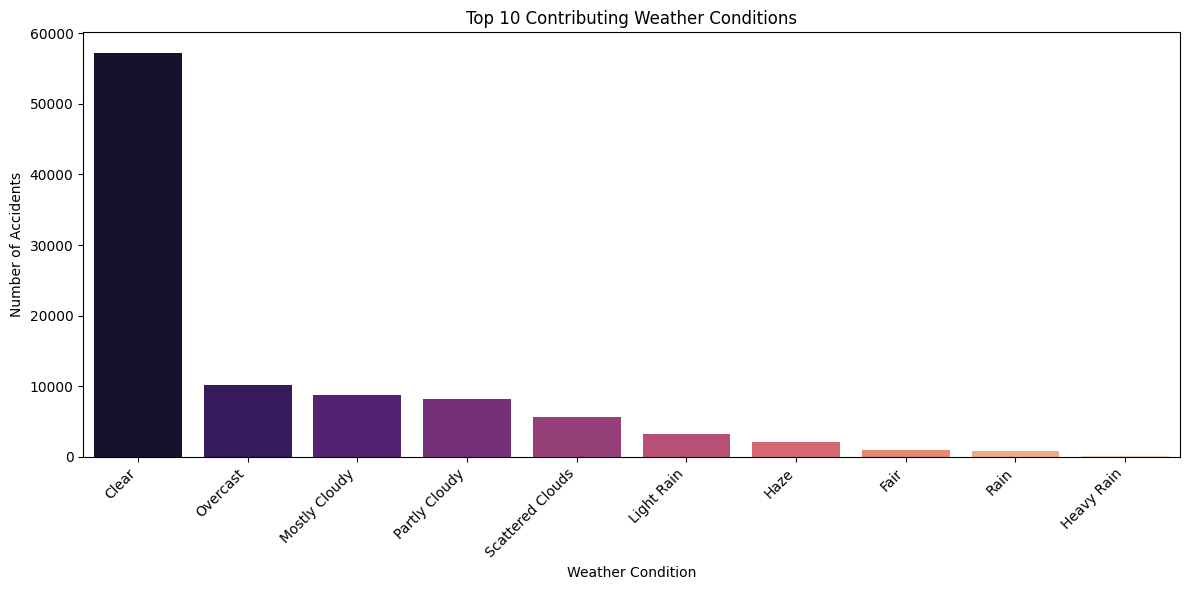

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.figure(figsize=(10, 8))
plt.scatter(
    accidents_df['Start_Lng'],
    accidents_df['Start_Lat'],
    s=1,
    alpha=0.1,
    color='darkred'
)
plt.title('Accident Hotspots (Geographic Density)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


top_weather_conditions = accidents_df['Weather_Condition'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_weather_conditions.index,
    y=top_weather_conditions.values,
    palette="magma"
)
plt.title('Top 10 Contributing Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()